In [3]:
# bit.ly/perch_data
import numpy as np

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

In [7]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [8]:
test_input

array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
       16.2, 28. , 27.3])

In [9]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [10]:
train_input = train_input.reshape(-1,1)

In [11]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [12]:
test_input = test_input.reshape(-1,1)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knr = KNeighborsRegressor(n_neighbors = 3)

In [15]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [17]:
print(knr.predict([[100]]))

[1033.33333333]


In [18]:
import matplotlib.pyplot as plt

In [19]:
distance, indexes = knr.kneighbors([[50]])

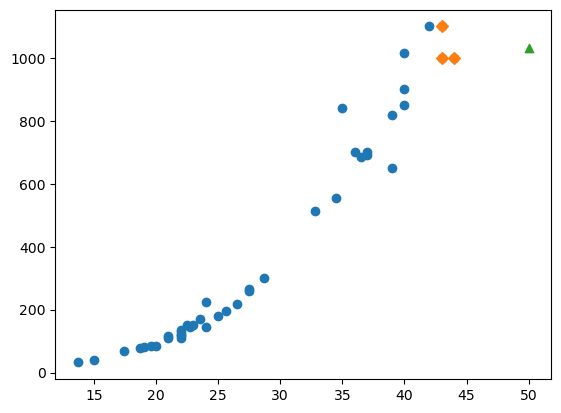

In [22]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker = '^')

In [24]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(train_input, train_target)

LinearRegression()

In [28]:
print(lr.predict([[50]]))

[1241.83860323]


In [29]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


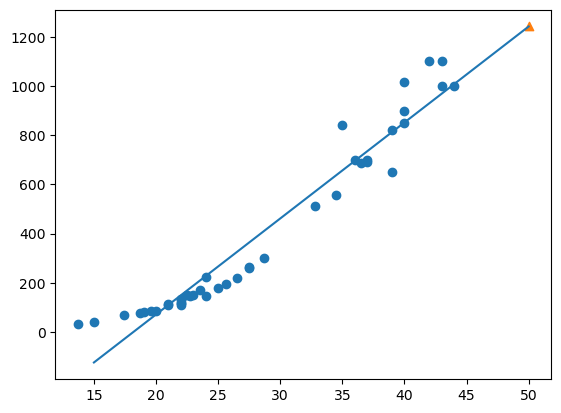

In [32]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker = '^')

In [33]:
train_poly = np.column_stack((train_input ** 2, train_input))

In [34]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [35]:
test_poly = np.column_stack((test_input ** 2, test_input))

In [36]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [37]:
lr = LinearRegressor()

NameError: name 'LinearRegressor' is not defined

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(train_poly, train_target)

LinearRegression()

In [42]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [43]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [44]:
point = np.arange(15,50)

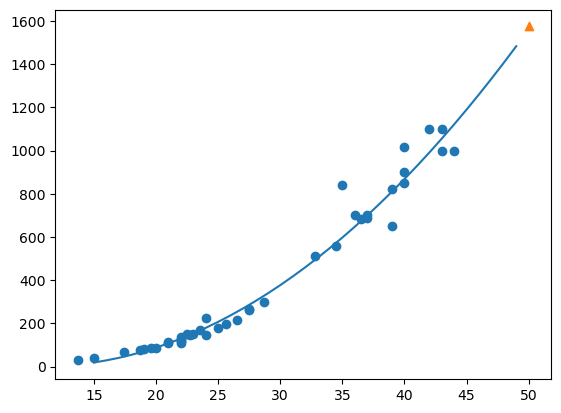

In [47]:
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point+116.05)
plt.scatter(50, 1573.9, marker = '^')

In [48]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [49]:
print(lr.score(test_poly, test_target))

0.9775935108325121


In [51]:
# bit.ly/perch_data
import pandas as pd

In [52]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [53]:
df = pd.read_csv('https://bit.ly/perch_csv_data')

In [55]:
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [57]:
perch_full = df.to_numpy()

In [58]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

In [62]:
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [63]:
train_input.shape

(42, 3)

In [64]:
test_input.shape

(14, 3)

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures()

In [67]:
poly.fit([[2,3]])

PolynomialFeatures()

In [69]:
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [70]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [71]:
poly = PolynomialFeatures(include_bias=False)

In [81]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [73]:
print(train_poly.shape)

(42, 9)


In [74]:
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [75]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [82]:
lr.fit(train_poly, train_target)
lr.fit(test_poly, test_target)

LinearRegression()

In [79]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [83]:
print(lr.score(test_poly, test_target))

0.9974916793472933


In [87]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [88]:
lr.fit(train_poly, train_target)

LinearRegression()

In [89]:
print(lr.score(train_poly, train_target))

0.9999999999938143


In [91]:
print(lr.score(test_poly, test_target))

-144.40744532797535


In [92]:
test_poly.shape

(14, 55)

In [94]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [95]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

In [96]:
from sklearn.linear_model import Ridge

In [97]:
ridge = Ridge()

In [98]:
ridge.fit(train_scaled, train_target)

Ridge()

In [99]:
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [100]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


In [101]:
train_scaled.shape

(42, 55)

In [102]:
test_scaled.shape

(14, 55)

In [103]:
import matplotlib.pyplot as plt

In [104]:
train_score = []
test_score = []

In [107]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [108]:
train_score

[0.9930455252088589,
 0.9917809981250533,
 0.9903815817570368,
 0.9896101671037343,
 0.988728468997471,
 0.9841843235774494]

In [109]:
test_score

[0.9569388961572401,
 0.9800187936873217,
 0.9827976465386896,
 0.9790693977615386,
 0.9725329582461569,
 0.9627042641050291]

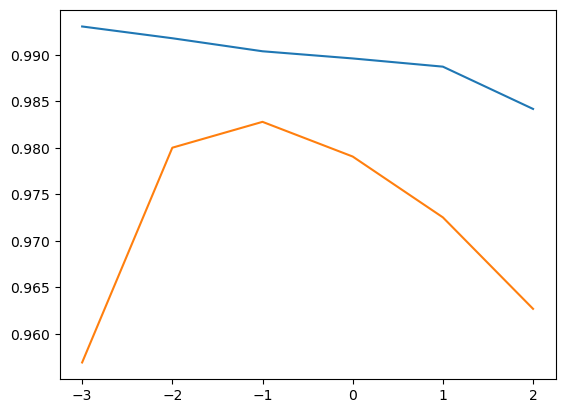

In [111]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [112]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [113]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


In [114]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [115]:
lasso.fit(train_scaled, train_target)

Lasso()

In [116]:
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [117]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [123]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\ds\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ds\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [120]:
train_score

[0.9924957354689654,
 0.9922988130765112,
 0.9902080238600284,
 0.9898116789062786,
 0.9887624603020236,
 0.9078618674946647]

In [121]:
test_score

[0.9731817502723488,
 0.976154561118455,
 0.9824382983968608,
 0.9801844137326113,
 0.9830309645308443,
 0.9090772073024516]

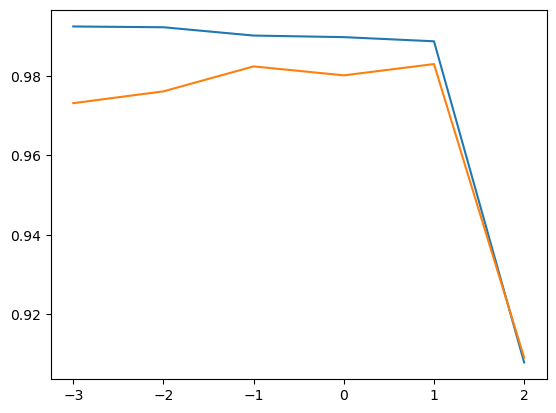

In [124]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [125]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [126]:
print(lasso.score(train_scaled, train_target))

0.9888067471131867


In [127]:
print(lasso.score(test_scaled, test_target))

0.9824470598706695


In [129]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [131]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [132]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [134]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [135]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [136]:
fish_target = fish['Species'].to_numpy()

In [137]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state = 42)

In [141]:
train_input

array([[7.20000e+02, 3.50000e+01, 4.06000e+01, 1.63618e+01, 6.09000e+00],
       [5.00000e+02, 4.50000e+01, 4.80000e+01, 6.96000e+00, 4.89600e+00],
       [7.50000e+00, 1.05000e+01, 1.16000e+01, 1.97200e+00, 1.16000e+00],
       [1.10000e+02, 2.20000e+01, 2.35000e+01, 5.52250e+00, 3.99500e+00],
       [1.40000e+02, 2.07000e+01, 2.32000e+01, 8.53760e+00, 3.29440e+00],
       [6.90000e+01, 1.82000e+01, 2.03000e+01, 5.29830e+00, 2.82170e+00],
       [1.10000e+02, 2.10000e+01, 2.25000e+01, 5.69250e+00, 3.55500e+00],
       [6.20000e+02, 3.45000e+01, 3.97000e+01, 1.55227e+01, 5.28010e+00],
       [1.30000e+02, 2.13000e+01, 2.28000e+01, 6.38400e+00, 3.53400e+00],
       [8.50000e+01, 2.00000e+01, 2.10000e+01, 5.08200e+00, 2.77200e+00],
       [6.85000e+02, 3.65000e+01, 3.90000e+01, 1.08810e+01, 6.86400e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.14000e+02, 3.28000e+01, 3.40000e+01, 1.00300e+01, 6.01800e+00],
       [2.00000e+02, 2.30000e+01, 2.58

In [142]:
test_input

array([[7.80000e+01, 1.87000e+01, 1.94000e+01, 5.19920e+00, 3.12340e+00],
       [1.34000e+01, 1.24000e+01, 1.35000e+01, 2.43000e+00, 1.26900e+00],
       [2.00000e+02, 3.23000e+01, 3.48000e+01, 5.56800e+00, 3.37560e+00],
       [2.70000e+02, 2.60000e+01, 2.87000e+01, 8.38040e+00, 4.24760e+00],
       [1.50000e+02, 2.30000e+01, 2.45000e+01, 5.21850e+00, 3.62600e+00],
       [1.00000e+03, 3.70000e+01, 4.26000e+01, 1.89570e+01, 6.60300e+00],
       [7.00000e+00, 1.06000e+01, 1.16000e+01, 1.72840e+00, 1.14840e+00],
       [1.80000e+02, 2.52000e+01, 2.79000e+01, 7.08660e+00, 3.90600e+00],
       [1.88000e+02, 2.46000e+01, 2.62000e+01, 6.73340e+00, 4.16580e+00],
       [1.25000e+03, 5.60000e+01, 5.97000e+01, 1.06863e+01, 6.98490e+00],
       [6.50000e+02, 3.35000e+01, 3.87000e+01, 1.44738e+01, 5.72760e+00],
       [1.00000e+03, 4.00000e+01, 4.35000e+01, 1.23540e+01, 6.52500e+00],
       [6.00000e+02, 3.20000e+01, 3.72000e+01, 1.54380e+01, 5.58000e+00],
       [1.50000e+02, 2.00000e+01, 2.24

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [158]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [147]:
print(train_scaled)

[[ 9.19657820e-01  6.09431747e-01  8.10412209e-01  1.85194896e+00
   1.00075672e+00]
 [ 3.00412188e-01  1.54653445e+00  1.45316551e+00 -4.69816625e-01
   2.72917446e-01]
 [-1.08585360e+00 -1.68646987e+00 -1.70848587e+00 -1.70159849e+00
  -2.00447580e+00]
 [-7.97341433e-01 -6.08801762e-01 -6.74869070e-01 -8.24805885e-01
  -2.76314705e-01]
 [-7.12898847e-01 -7.30625113e-01 -7.00926637e-01 -8.02298036e-02
  -7.03386897e-01]
 [-9.12746301e-01 -9.64900787e-01 -9.52816444e-01 -8.80171862e-01
  -9.91535662e-01]
 [-7.97341433e-01 -7.02512032e-01 -7.61727625e-01 -7.82824547e-01
  -5.44530184e-01]
 [ 6.38182533e-01  5.62576612e-01  7.32239510e-01  1.64473401e+00
   5.07057367e-01]
 [-7.41046376e-01 -6.74398951e-01 -7.35670058e-01 -6.12059278e-01
  -5.57331377e-01]
 [-8.67710255e-01 -7.96222301e-01 -8.92015456e-01 -9.33586942e-01
  -1.02183182e+00]
 [ 8.21141469e-01  7.49997152e-01  6.71438522e-01  4.98470601e-01
   1.47257213e+00]
 [ 3.00412188e-01  2.34590667e-01  4.28234570e-01  1.36042157e+00

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
kn = KNeighborsClassifier(n_neighbors=3)

In [152]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [156]:
print(kn.score(train_scaled, train_target))

0.8907563025210085


In [159]:
print(kn.score(test_scaled, test_target))

0.85


In [161]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [162]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [163]:
test_scaled

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [-0.60030873, -0.3089289 , -0.29269143, -0.43855288, -0.33056738],
       [-0.57779071, -0.36515506, -0.44035097, -0.52577528, -0.17219833],
       [ 2.41147684,  2.57734741,  2.4694106 ,  0.45038962,  1.54627043],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 1.70778862,  1.0779831 ,  1.06230202,  0.86222655,  1.2659243 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [-0.68475132, -0.7962223 , -0.7

In [167]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [168]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [169]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [176]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

In [193]:
bream_smelt_indexes.shape

(119,)

In [177]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [178]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [192]:
train_bream_smelt.shape

(33, 5)

In [191]:
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [179]:
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr = LogisticRegression()

In [182]:
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [183]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [184]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [186]:
print(lr.classes_)

['Bream' 'Smelt']


In [187]:
lr

LogisticRegression()

In [189]:
lr = LogisticRegression(C=20, max_iter=1000)
lr = lr.fit(train_scaled, train_target)

In [190]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [194]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [195]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [196]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [197]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [198]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [218]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [219]:
fish_target = fish['Species'].to_numpy()

In [220]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state=42)

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
ss = StandardScaler()

In [225]:
ss.fit(train_input)

StandardScaler()

In [226]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [227]:
from sklearn.linear_model import SGDClassifier

In [233]:
sc = SGDClassifier(loss='log_loss', max_iter=20, random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\ds\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=20, random_state=42)

In [232]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [235]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=20, random_state=42)

In [236]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8823529411764706
0.9
